In [1]:
!pip install scikit-learn

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn

In [5]:
import os
import json

In [6]:
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [7]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [8]:
# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)


# Users Dataset

In [9]:
#userDataset = pd.read_csv('raw_data\steam_users_purchase_play.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data\\steam_users_purchase_play.csv'

In [ ]:
dfUsers = pd.DataFrame(userDataset)

In [ ]:
list(dfUsers.columns)

In [ ]:
display(dfUsers)

# Games Dataset

In [ ]:
# games2005 = pd.read_csv('raw_data\year 2005-2008.csv')
# games2008 = pd.read_csv('raw_data\year 2008-2011.csv')
# games2011 = pd.read_csv('raw_data\year 2011-2014.csv')
# games2014 = pd.read_csv('raw_data\year 2014-2017.csv')
# games2017 = pd.read_csv('raw_data\year 2017-2022.csv')

In [ ]:
# df2005 = pd.DataFrame(games2005)
# df2008 = pd.DataFrame(games2008)
# df2011 = pd.DataFrame(games2011)
# df2014 = pd.DataFrame(games2014)
# df2017 = pd.DataFrame(games2017)

In [ ]:
# dfGames = pd.concat([df2005, df2008,df2011,df2014,df2017], axis=0)

In [ ]:
# dfGames.info()

In [ ]:
#  dfGames.rename(columns={'name': 'game_name'},
#           inplace=True, errors='raise')

In [ ]:
# display(dfGames)

# Merged dataset

In [ ]:
#df=pd.merge(dfUsers,dfGames)

In [14]:
df = pd.read_csv('users_games_dataset.csv')

C:\Users\USCS\AppData\Local\Temp\ipykernel_5576\3590791216.py:1: DtypeWarning: Columns (85,103,115,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('users_games_dataset.csv')


In [ ]:
#df.to_csv('users_games_dataset.csv')

In [15]:
display(df)

,Unnamed: 0,user_id,game_name,hours,purchase,play,id,category,collection/id,collection/name,...,genres/5/id,genres/5/name,themes/5/id,themes/5/name,themes/6/id,themes/6/name,game_modes/4/id,game_modes/4/name,genres/6/id,genres/6/name
0,0,151603712,Fallout 4,87.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,87445402,Fallout 4,83.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,25096601,Fallout 4,1.6,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,211925330,Fallout 4,133.0,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,115396529,Fallout 4,17.9,1,1,9630,0,3,Fallout,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,14201,76892907,Double Dragon Trilogy,0.0,1,0,23805,3,694,Double Dragon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14202,14202,76892907,EvilQuest,0.0,1,0,3237,0,585,EvilQuest,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14203,14203,204401529,Assassin's Creed Rogue,62.0,1,1,7570,0,18,Assassin's Creed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14204,14204,116564064,Assassin's Creed Rogue,0.0,1,0,7570,0,18,Assassin's Creed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Columns: 128 entries, Unnamed: 0 to genres/6/name
dtypes: float64(48), int64(22), object(58)
memory usage: 13.9+ MB


In [17]:
columns=df.columns.tolist()
print(columns)

['Unnamed: 0', 'user_id', 'game_name', 'hours', 'purchase', 'play', 'id', 'category', 'collection/id', 'collection/name', 'franchises/0/id', 'franchises/0/name', 'game_modes/0/id', 'game_modes/0/name', 'genres/0/id', 'genres/0/name', 'keywords/0/id', 'keywords/0/name', 'keywords/1/id', 'keywords/1/name', 'keywords/2/id', 'keywords/2/name', 'keywords/3/id', 'keywords/3/name', 'keywords/4/id', 'keywords/4/name', 'keywords/5/id', 'keywords/5/name', 'keywords/6/id', 'keywords/6/name', 'keywords/7/id', 'keywords/7/name', 'keywords/8/id', 'keywords/8/name', 'keywords/9/id', 'keywords/9/name', 'keywords/10/id', 'keywords/10/name', 'keywords/11/id', 'keywords/11/name', 'keywords/12/id', 'keywords/12/name', 'keywords/13/id', 'keywords/13/name', 'keywords/14/id', 'keywords/14/name', 'keywords/15/id', 'keywords/15/name', 'keywords/16/id', 'keywords/16/name', 'keywords/17/id', 'keywords/17/name', 'keywords/18/id', 'keywords/18/name', 'keywords/19/id', 'keywords/19/name', 'keywords/20/id', 'keyword

In [18]:
i=2

print('keywords/'+str(i)+'/name')

keywords/2/name


In [ ]:
for j in range(0, len(columns)):
    if j>21:
        print('keywords/'+str(j)+'/name')
        df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
        df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [ ]:
for j in range(21, len(columns)):
    print('keywords/'+str(j)+'/name')
    df = df.drop(['keywords/'+str(j)+'/name'], axis=1)
    df = df.drop(['keywords/'+str(j)+'/id'], axis=1)

In [ ]:
for j in range(2, len(columns)):
    print('keywords/'+str(j)+'/name')
    df = df.drop(['franchises/'+str(j)+'/name'], axis=1)
    df = df.drop(['franchises/'+str(j)+'/id'], axis=1)

In [ ]:
for j in range(6, len(columns)):
    print('keywords/'+str(j)+'/name')
    df = df.drop(['platforms/'+str(j)+'/name'], axis=1)
    df = df.drop(['platforms/'+str(j)+'/id'], axis=1)

In [19]:
dfColumns=df.columns

# Analysing feature values

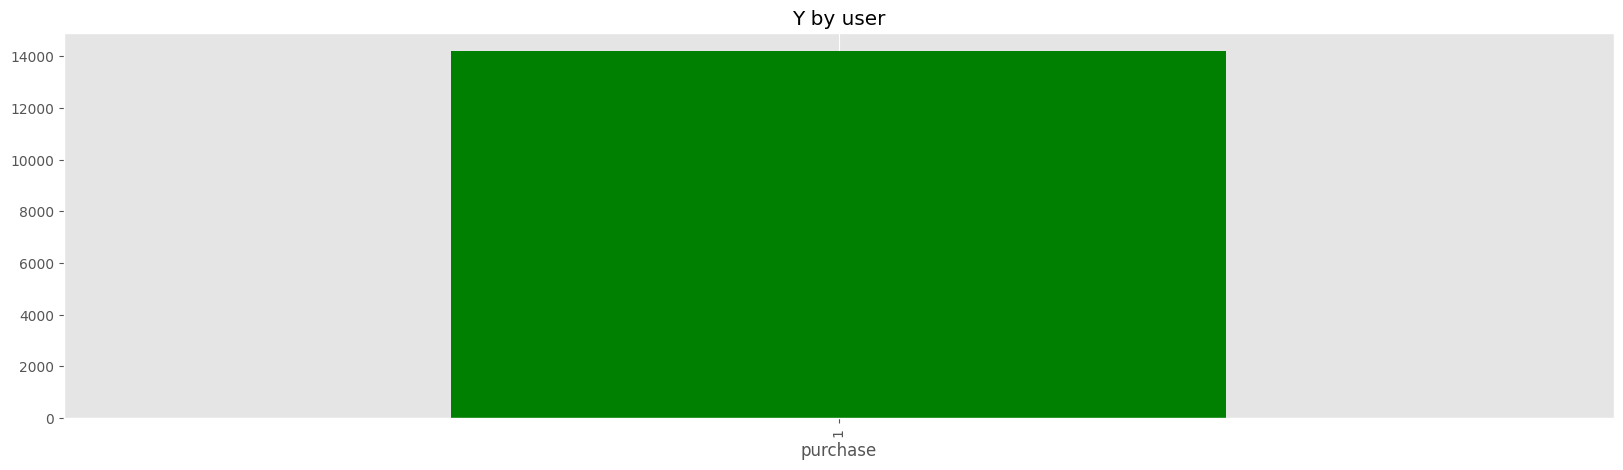

In [24]:
df.groupby("purchase").count()["game_name"].sort_values(ascending=False).plot(
    kind="bar", color="green", title="Y by user", figsize=(20,5)).grid(axis='y')

C:\Users\USCS\AppData\Local\Temp\ipykernel_5576\3617179693.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="hours",y="game_name", data=df, palette="Dark2", s=300)


<AxesSubplot: xlabel='hours', ylabel='game_name'>

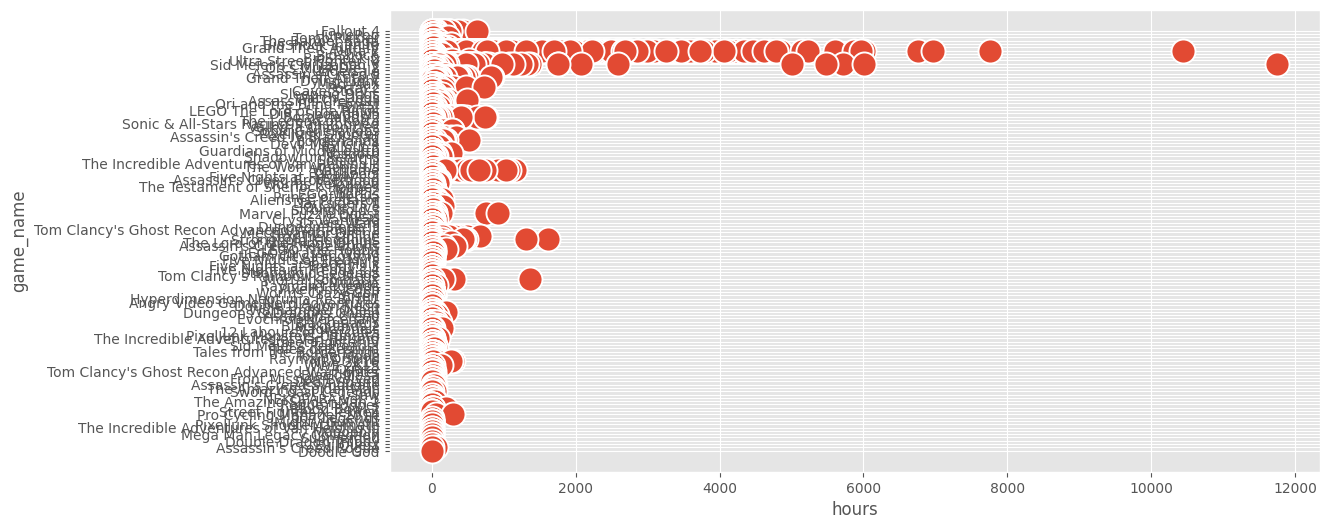

In [27]:
#sns.scatterplot(x="hours",y="game_name", data=df, palette="Dark2", s=80)

In [ ]:
tags_names = df['popular_tags'].unique()

In [ ]:
display(tags_names)

In [ ]:
print(type(tags_names))

In [ ]:
tags_names=pd.DataFrame(tags_names)

In [ ]:
#tags_names.to_csv('tags_names.csv')

# Analysing data

In [ ]:
sns.pairplot(df)

In [ ]:
sns.kdeplot(df['hours'])

In [ ]:
df["hours"].value_counts()

In [ ]:
values=np.cumsum(np['hours'])
 
# use the plot function
plt.plot(values)

# show the graph
plt.show()
